<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/Bootcamp_DataScience_projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Final de Conclusão de Curso
###Bootcamp Data Science Aplicada 2 by [Alura](https://www.alura.com.br/) 
####Autor: Helton Cordeiro
e-mail: heltoncordeiro@gmail.com


---

# **Objetivo do projeto**

#### **Prever** quais pacientes precisarão ser admitidos(as) na UTI e com isso **definir** qual a necessidade de leitos de UTI do hospital, a partir dos dados clínicos individuais disponíveis.

---

* Informação demográfica - 3 variáveis
* Doenças pré-existens - 9 variáveis
* Resultados de exames de sangue - 36 variáveis
* Sinais vitais - 6 variáveis


---


* RESUMO

Ideia do trabalho e principais resultados

* INTRODUÇÃO

Introdução sobre o problema (Kaggle) mas com suas palavras.


* Organização

Estrutura, seção de funções, seção de imports bem documentada. O projeto é para ficar no portfolio e para que outras pessoas possam aprender.

* Sequência lógica e linha de raciocínio desenvolvida



---



## Entendendo o Problema e Iniciando no Kaggle



[Kaggle](https://www.kaggle.com) 
* Crie uma conta e conheça o ambiente do Kaggle, permite também a criação de notebooks.

Fonte de Dados para estudo

url: https://www.kaggle.com/S%C3%ADrio-Libanes/covid19




##Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates  as mdates

import datetime as dt
import warnings
warnings.simplefilter(action='ignore')

from pandas.plotting import autocorrelation_plot

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot, plot_cross_validation_metric

from sklearn.metrics import mean_absolute_error
import logging

## Configurações iniciais

In [ ]:
logging.getLogger('fbprophet').setLevel(logging.WARNING)
pd.options.display.float_format = "{:,.2f}".format
sns.set()
sns.set_style("ticks")

mpl.rcParams['figure.figsize']= (16,8)
mpl.rcParams['figure.titlesize']= 18
mpl.rcParams['figure.titleweight']= 'bold'
mpl.rcParams['axes.labelsize']= 16
mpl.rcParams['axes.titlesize']= 18
mpl.rcParams['axes.titleweight']= 'bold'
mpl.rcParams['xtick.labelsize']= 11
mpl.rcParams['ytick.labelsize']= 11
mpl.rcParams['legend.fontsize']= 'large'
mpl.rcParams['date.autoformatter.day']= '%d/%m/%Y'
mpl.rcParams['grid.color']='grey'
mpl.rcParams['grid.linestyle']= '--'
mpl.rcParams['grid.linewidth']= 0.5

## Análise Exploratório
Utilizando o Colab a fonte de dados está congelada no dia da obtenção: 06/07/2021.

Vamos ver o que temos no DataFrame:

### Realizando a carga de dados

In [ ]:
#url onde está a nossa base de dados
url = 'https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/dados/sirio-libanes/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true'

#carrego as informações para a variável dados (a base está no formato csv mas em um arquivo zipado)
dados_raw = pd.read_excel(url, thousands=".")
dados = dados_raw.copy()

### Informações sobre a base de dados

In [ ]:
display(dados_raw.shape)
display(print(40*"--x"))
display(dados_raw.info())
display(print(40*"--x"))
display(dados_raw.head())
display(print(40*"--x"))

(2331712, 18)

--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331712 entries, 0 to 2331711
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      int64  
 12  last_available_deaths                     

None

--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x


None

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,"1,200,401.00",2020-03-17,202012,"413,418.00","407,319.00",False,False,3,"72,566.00",2020-03-17,0,0,1,city,AC,3,0
1,NaN,12.00,2020-03-17,202012,"894,470.00","881,935.00",False,False,3,"33,539.00",2020-03-17,0,0,1,state,AC,3,0
2,Rio Branco,"1,200,401.00",2020-03-18,202012,"413,418.00","407,319.00",False,False,3,"72,566.00",2020-03-18,0,0,2,city,AC,0,0
3,NaN,12.00,2020-03-18,202012,"894,470.00","881,935.00",False,False,3,"33,539.00",2020-03-18,0,0,2,state,AC,0,0
4,Rio Branco,"1,200,401.00",2020-03-19,202012,"413,418.00","407,319.00",False,False,4,"96,754.00",2020-03-19,0,0,3,city,AC,1,0


--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x


None

### Adicionando informações de região e ajustando o campo data

In [ ]:
dados_full = casos_full_raw.copy()

###Verificando os repetidos e zerados

Verificando quantos registros repetidos temos no dataFrame para avaliar se podem afetar nossa análise

In [ ]:
dados_PR[dados_PR.repetido.eq(True)]

,data,regiao,uf,cidade,populacao_estimada,tipo_local,casos_novos,obitos_novos,repetido
2,2020-03-14,Centro-Oeste,PR,NaN,"11,516,840.00",state,0,0,True
3,2020-03-15,Centro-Oeste,PR,NaN,"11,516,840.00",state,0,0,True


Apenas 2 (dois) registros duplicados não afetarão nossa análise.

In [ ]:
dados_PR.query('casos_novos == 0')

,data,regiao,uf,cidade,populacao_estimada,tipo_local,casos_novos,obitos_novos,repetido,casos_acumulados,obitos_acumulados,media_movel_casos,media_movel_obitos,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,obitosNovos7,obitosNovos12,obitosNovos15,obitosNovos28,ano,mes
1,2020-03-13,Centro-Oeste,PR,NaN,"11,516,840.00",state,0,0,False,6,0,nan,nan,-6.00,0.00,0.00,0.00,0.00,2.00,2020,3
2,2020-03-14,Centro-Oeste,PR,NaN,"11,516,840.00",state,0,0,True,6,0,nan,nan,0.00,0.00,0.00,0.00,0.00,1.00,2020,3
3,2020-03-15,Centro-Oeste,PR,NaN,"11,516,840.00",state,0,0,True,6,0,nan,nan,0.00,0.00,0.00,2.00,1.00,4.00,2020,3
4,2020-03-16,Centro-Oeste,PR,NaN,"11,516,840.00",state,0,0,False,6,0,nan,nan,0.00,0.00,0.00,0.00,0.00,2.00,2020,3
136,2020-07-26,Centro-Oeste,PR,NaN,"11,516,840.00",state,0,18,False,65593,1671,"1,618.80",42.50,"-1,334.00",-37.00,30.00,121.00,53.00,16.00,2020,7


5 (cinco) registros zerados de casos novos comunicados sendo 4 deles em Março de 2020, como veremos os 4 (quatro) primeiros meses de 2020 a situação estava controlada. 

### Criando novas colunas com informações para estudo

A fim de apurar o tempo médio entre a contaminação e o óbitos, busquei informações na mídia sobre o assunto.

* Segunda essa matéria do [Amazonas atual](https://amazonasatual.com.br/tempo-medio-entre-o-inicio-dos-sintomas-e-morte-por-covid-19-e-de-12-dias-diz-fvs/), o tempo médio entre o início dos sintomas e morte por Covid-19 é de **12 dias**, diz FVS (Fundação de Vigilância em Saúde do Amazonas) - 20/05/2020

* Esse outra matéria do [IG](https://saude.ig.com.br/2020-07-24/em-media-covid-19-leva-15-dias-para-matar-pacientes-no-brasil-aponta-estudo.html) informa que em média, Covid-19 leva **15 dias** para matar pacientes no Brasil - 24/07/2020

* Nessa matéria do [Diário do Nordeste](https://diariodonordeste.verdesmares.com.br/metro/tempo-medio-entre-inicio-de-sintomas-e-morte-por-covid-no-ceara-e-10-dias-maior-na-segunda-onda-1.3097493) o tempo médio entre início de sintomas e morte por Covid no Ceará é de 10 (dez) dias maior na segunda onda, em 2021, intervalo entre primeiros sinais da doença e o óbito do paciente é de **28 dias** - 15/06/2021


Considerando as matérias acima, vamos criar colunas com o registro de óbitos de acordo com os dias médios apresentados, além de campos para os casos acumulados e a média móvel de 10 dias, além da taxa de crescimento de casos e óbitos.


In [ ]:
dados_PR['casos_acumulados'] = dados_PR['casos_novos'].cumsum()
dados_PR['obitos_acumulados'] = dados_PR['obitos_novos'].cumsum()

dados_PR['media_movel_casos'] = dados_PR['casos_novos'].rolling(window=10).mean()
dados_PR['media_movel_obitos'] = dados_PR['obitos_novos'].rolling(window=10).mean()

dados_PR['taxa_de_crescimento_casos'] = dados_PR['casos_novos'].diff()
dados_PR['taxa_de_crescimento_obitos'] = dados_PR['obitos_novos'].diff()

dados_PR['obitosNovos7'] = dados_PR['obitos_novos'].shift(-7)
dados_PR['obitosNovos12'] = dados_PR['obitos_novos'].shift(-12)
dados_PR['obitosNovos15'] = dados_PR['obitos_novos'].shift(-15)
dados_PR['obitosNovos28'] = dados_PR['obitos_novos'].shift(-28)

dados_PR['ano'] = pd.DatetimeIndex(dados_PR.data).year
dados_PR['mes'] = pd.DatetimeIndex(dados_PR.data).month

#Evolução da COVID-19 no Estado do Paraná

**Dados gerais do Paraná**
* Região: **Sul**.
* Capital: **Curitiba**.
* Área territorial: **199.315 km²** (IBGE, 2019).
* População: **11.516.840 habitantes** (IBGE, 2020).
* Densidade demográfica: **52,4 hab./km²** (IBGE, 2010).
* Fuso: **UTC-3**.
* Clima: **subtropical**.



####Tabela com os registros de 01/11/2020 até 31/03/2021 com mais de 8.000 (oito mil) casos novos.

In [ ]:
df_tab = dados_PR[['data','casos_novos','obitos_novos']].query('data > "2020-11-01" and casos_novos > 8000 and data < "2021-03-31"').reset_index()
df_tab['data'] = df_tab['data'].dt.strftime('%d/%m/%Y')
df_tab

,index,data,casos_novos,obitos_novos
0,246,13/11/2020,9913,78
1,279,16/12/2020,20197,198
2,287,24/12/2020,9793,72
3,301,07/01/2021,32436,396
4,306,12/01/2021,8983,117
5,359,06/03/2021,8598,148
6,360,07/03/2021,45020,247
7,363,10/03/2021,8345,244
8,372,19/03/2021,8146,269
9,378,25/03/2021,11331,296


Vamos dar um ZOOM no gráfico acima, limitando nosso eixo (y) em 15.000 (quinze mil)

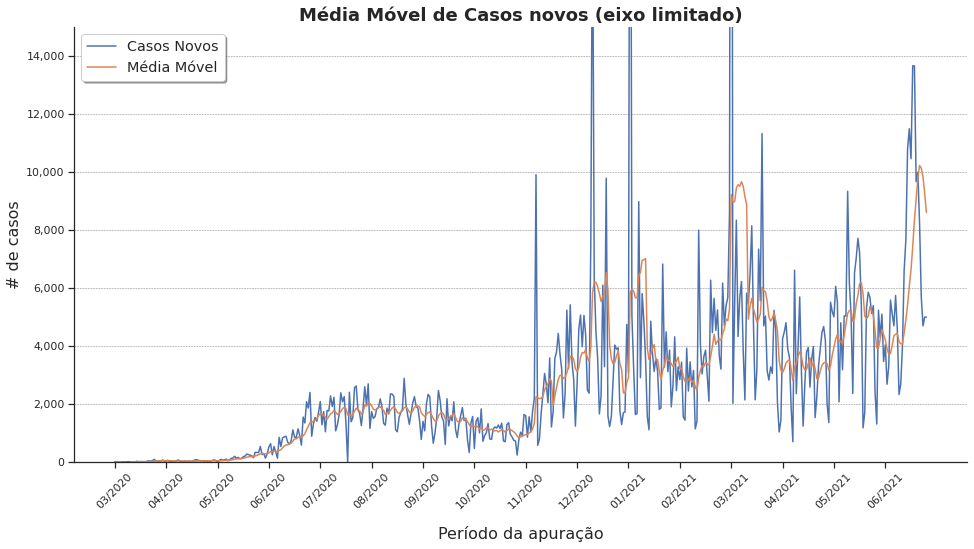

In [ ]:
fig, ax = plt.subplots()
plt.title('Média Móvel de Casos novos (eixo limitado)')
sns.lineplot(x='data', y='casos_novos', data=dados_PR, ax=ax)
sns.lineplot(x='data', y='media_movel_casos', data=dados_PR, ax=ax)
plt.xlabel('Período da apuração', labelpad=15)
plt.ylabel('# de casos')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.ylim(0,15000)
sns.despine()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.legend(labels=['Casos Novos', 'Média Móvel'], loc=2, frameon=True, shadow=True)
plt.show()

# Conclusão

---

Foram importados os dados do site [Brasil.IO](https://brasil.io/dataset/covid19/caso_full/) em 30/06/2021 e fizemos diversos gráficos para demonstrar a evolução do contágio da COVID-19 e consequentemente os óbitos no Estado do Paraná. Foi apresentado os gráficos de média móvel de casos e óbitos diários e realizamos estudos com o Prophet() para análise e desenvolvimento de um modelo de previsão de novos casos.

A situação é preocupante no Paraná, mesmo com o avanço da vacinação a média móvel nesse ano de 2021 aumentou consideravelmente, temos a apresentação de uma queda no final do mês de junho/2021 no gráfico de média móvel e esperamos ser uma tendência e não apenas uma falha de comunicação das informações.

O surgimento de novas cepas, a baixa cobertura vacinal no Estado (com 40% a população vacinadas com a 1ª dose e apensa 15% com a 2º dose) e a falta de conscientização da população, são desafios para que consigamos voltar ao convívio social de Janeiro de 2020.

## Sugestão de Estudo

* Desenvolver um modelo para analisar os casos de óbitos e aplicar o modelo desenvolvido nas cidades do Estado.